<a href="https://colab.research.google.com/github/aziz0519/Python-Programs/blob/master/Text_analytics_of_blockchain_whitepapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive

from google.colab import drive
from google.colab import files 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import libraries

import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load data
data = pd.read_json(r"/content/drive/My Drive/df.json",orient='colunms')
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1
10,AceD,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,11710,aced,18/07/2018,0.343592,09/09/2019,0.010304,-0.333287,1
100,Bitcoin Private,\n \n\n \n\n \n\nW H I T E P A P E R \n\n \n ...,4989,bitcoin-private,21/03/2018,34.124885,09/09/2019,0.228600,-33.896285,1
101,Bitcoin Rhodium,WHITEPAPER\n\n Limited - Rare - Resistant\n\nB...,1633,bitcoin-rhodium,01/02/2019,5.138751,09/09/2019,20.343213,15.204461,0


In [4]:
data.shape

(884, 10)

In [5]:
def tsplit(s,sep):
  stack = [s]
  for char in sep:
    pieces = []
    for substr in stack:
      pieces.extend(substr.split(char))
      stack = pieces
  return stack

first_text = data['text'][0]
first_text

'The 0Chain Consensus Protocol\n\nJonathan Katz1(cid:63), Thomas Austin2, Siva Dirisala3, and Saswata Basu3\n\n1 Dept. of Computer Science, University of Maryland.\n\n2 0Chain LLC and San Jose State University.\n\n3 0Chain LLC.\n\nAbstract. We describe the 0Chain blockchain ecosystem, including a\nnew consensus protocol oﬀering fast ﬁnality. We provide proofs of security\nfor the protocol, along with experiment results validating its eﬃciency\nunder realistic network conditions.\n\n1\n\nIntroduction\n\nSince the advent of Bitcoin [Nak09], the blockchain has revolutionized the world\nof cryptocurrencies and distributed computation. Ethereum [Woo14] further de-\nveloped this promise by integrating Turing-complete smart contracts into the\nblockchain for building distributed applications (dApps).\n\nDespite the promise of blockchain protocols, they have been held back by\ntheir slow consensus times. For example, in Bitcoin a transaction is not con-\nsidered ﬁnalized until it is six blocks

In [6]:
clean_text = []
clean_text_length = []

for text in data['text']:
  split_text = tsplit(text, (" ","\n","-\n","\t","\r","\u2000","\u200b","cid:","\xa0","\x0c", "(", ")"))
  split_text = [i for i in split_text if i != '']
  clean_text.append(split_text)
  clean_text_length.append(len(split_text))
  
len(clean_text)

884

In [7]:
data['clean_text'] = clean_text
data['clean_text_length'] = clean_text_length
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289
10,AceD,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,11710,aced,18/07/2018,0.343592,09/09/2019,0.010304,-0.333287,1,"[v1.0.2, TABLE, OF, CONTENTS, ABSTRACT, .........",11733
100,Bitcoin Private,\n \n\n \n\n \n\nW H I T E P A P E R \n\n \n ...,4989,bitcoin-private,21/03/2018,34.124885,09/09/2019,0.228600,-33.896285,1,"[W, H, I, T, E, P, A, P, E, R, The, Revolution...",5023
101,Bitcoin Rhodium,WHITEPAPER\n\n Limited - Rare - Resistant\n\nB...,1633,bitcoin-rhodium,01/02/2019,5.138751,09/09/2019,20.343213,15.204461,0,"[WHITEPAPER, Limited, -, Rare, -, Resistant, B...",1633


In [8]:
print(data['clean_text'][0])

['The', '0Chain', 'Consensus', 'Protocol', 'Jonathan', 'Katz1', '63', ',', 'Thomas', 'Austin2,', 'Siva', 'Dirisala3,', 'and', 'Saswata', 'Basu3', '1', 'Dept.', 'of', 'Computer', 'Science,', 'University', 'of', 'Maryland.', '2', '0Chain', 'LLC', 'and', 'San', 'Jose', 'State', 'University.', '3', '0Chain', 'LLC.', 'Abstract.', 'We', 'describe', 'the', '0Chain', 'blockchain', 'ecosystem,', 'including', 'a', 'new', 'consensus', 'protocol', 'oﬀering', 'fast', 'ﬁnality.', 'We', 'provide', 'proofs', 'of', 'security', 'for', 'the', 'protocol,', 'along', 'with', 'experiment', 'results', 'validating', 'its', 'eﬃciency', 'under', 'realistic', 'network', 'conditions.', '1', 'Introduction', 'Since', 'the', 'advent', 'of', 'Bitcoin', '[Nak09],', 'the', 'blockchain', 'has', 'revolutionized', 'the', 'world', 'of', 'cryptocurrencies', 'and', 'distributed', 'computation.', 'Ethereum', '[Woo14]', 'further', 'de-', 'veloped', 'this', 'promise', 'by', 'integrating', 'Turing-complete', 'smart', 'contracts',

In [9]:
!pip install textstat

     |████████████████████████████████| 3.0MB 4.2MB/s 


In [0]:
import textstat
from itertools import groupby
from string import punctuation

In [11]:
def retrieve_str(x):
  if len(x) == 0:
    return ''
  else:
    return ' '.join(x)
  
#Clean text and remove punctuation

def remove_dup_punc(x):
  new_text = []
  for k,g in groupby(x):
    if k in set(punctuation):
      new_text.append(k)
    else:
      new_text.extend(g)
  return ' '.join(new_text)

#create new column
data = data.sort_index()
data['clean_text2'] = data['clean_text'].apply(remove_dup_punc)


data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...


In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def preprocess(text):
  text = text.lower()
  text = re.sub('[^a-zA-Z]+',' ',text)
  words = text.split()
  wnl = WordNetLemmatizer()
  words2 = [wnl.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]
  words3 = ' '.join(words2)
  return words3

In [0]:
data['clean_text3'] = data['clean_text2'].astype(str).apply(preprocess)

In [16]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...


In [17]:
data['clean_text3'][10]

'v table content abstract aced ace dividend token context prelude platform identity chance game suite derivative market future iteration state channel implementation us potential casual gambling derivative user experience flip design issue front end back end avoiding manipulation roadmap marketing aced token crowdsale sale detail crowdsale date information token rate distribution allocation team disclaimer mention thanks reference page abstract etherace decentralized asset speculation betting platform based smart contract state channel blockchain technology provide different market instrument type user trader gambler benefit etherace platform built layer top ethereum enables bet placed value stored secure decentralized transaction ledger allows level enhanced transparency security lower fee intermediary required traditional online betting speculation platform cannot match platform logic handled autonomous open source smart contract creating trustless environment governing body three hi

In [0]:
from wordcloud import WordCloud

In [19]:
long_string = ",".join(list(data['clean_text3'].values))

print(len(long_string))

27098530


In [0]:
from wordcloud import STOPWORDS, ImageColorGenerator

In [0]:
stopwords  = set(STOPWORDS)
stopwords.update(["blockchain","user","data","whitepaper","use","using","used","white paper","one"])

In [0]:
wordcloud = WordCloud(width = 800, height = 600, background_color = "white", max_words = 1000, contour_width = 3 , contour_color= 'steelblue',stopwords=stopwords).generate(long_string) 

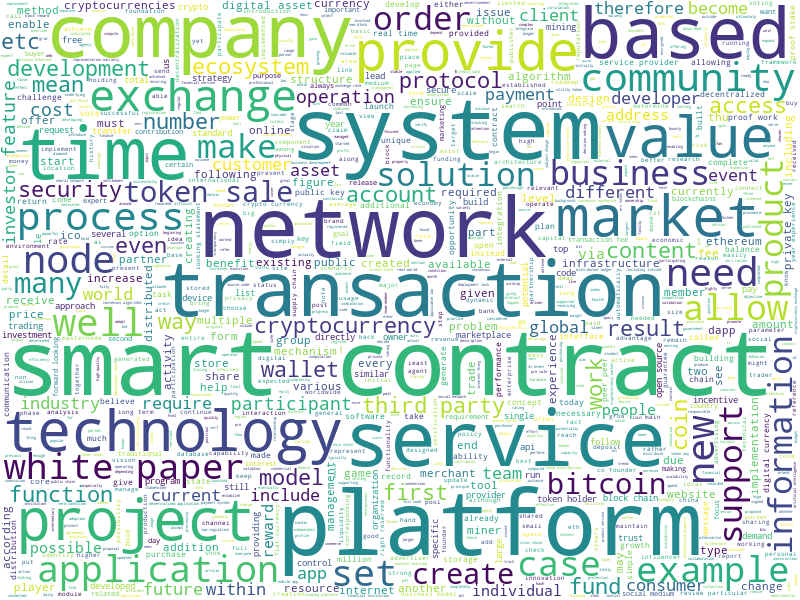

In [23]:
wordcloud.to_image()

In [24]:
list_words = []
list_words_length = []

for i in range(len(data)):
  split_text = data['clean_text3'][i].split()
  list_words.append(split_text)
  list_words_length.append(len(split_text))

len(list_words)

884

In [25]:
data['text_corpus'] = list_words
data['text_corpus_length'] = list_words_length
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470


(array([577., 256.,  40.,   7.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([    0. ,  7983.5, 15967. , 23950.5, 31934. , 39917.5, 47901. ,
        55884.5, 63868. , 71851.5, 79835. ]),
 <a list of 10 Patch objects>)

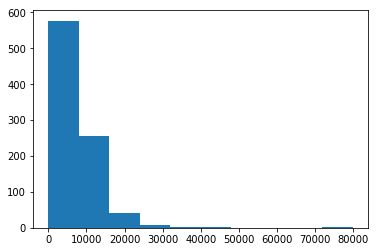

In [26]:
plt.hist(data['clean_text_length'])

(array([253., 281., 181.,  93.,  47.,  14.,   8.,   3.,   2.,   2.]),
 array([    0. ,  2140.7,  4281.4,  6422.1,  8562.8, 10703.5, 12844.2,
        14984.9, 17125.6, 19266.3, 21407. ]),
 <a list of 10 Patch objects>)

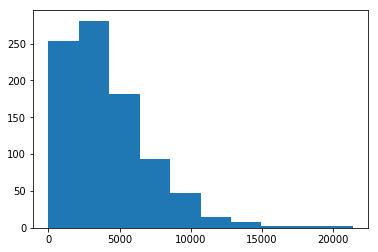

In [27]:
plt.hist(data['text_corpus_length'])

In [0]:
hasGithub = []

for cleaned_list in data['text_corpus']:
  if 'github' in [word.lower() for word in cleaned_list]:
    hasGithub.append(1)
  else:
    hasGithub.append(0)

In [0]:
hasBitcoin = []

for cleaned_list in data['text_corpus']:
  if 'bitcoin' in [word.lower() for word in cleaned_list]:
    hasBitcoin.append(1)
  else:
    hasBitcoin.append(0)

In [0]:
hasLinkedIn = []

for cleaned_list in data['text_corpus']:
  if 'linkedin' in [word.lower() for word in cleaned_list]:
    hasLinkedIn.append(1)
  else:
    hasLinkedIn.append(0)

In [0]:
hasTeamInfo = []

for cleaned_list in data['text_corpus']:
  if 'team' in [word.lower() for word in cleaned_list]:
    hasTeamInfo.append(1)
  else:
    hasTeamInfo.append(0)

In [0]:
hasBlockchain = []

for cleaned_list in data['text_corpus']:
  if 'blockchain' in [word.lower() for word in cleaned_list]:
    hasBlockchain.append(1)
  else:
    hasBlockchain.append(0)

In [33]:
data['hasGithub'] = hasGithub
data['hasLinkedIn'] = hasLinkedIn
data['hasBitcoin'] = hasBitcoin
data['hasTeamInfo'] = hasTeamInfo
data['hasBlockchain'] = hasBlockchain
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1


In [34]:
data['hasGithub'].value_counts()

0    606
1    278
Name: hasGithub, dtype: int64

In [35]:
data['hasLinkedIn'].value_counts()

0    777
1    107
Name: hasLinkedIn, dtype: int64

In [36]:
data['hasBitcoin'].value_counts()

1    639
0    245
Name: hasBitcoin, dtype: int64

In [37]:
data['hasTeamInfo'].value_counts()

1    705
0    179
Name: hasTeamInfo, dtype: int64

In [38]:
data['hasBlockchain'].value_counts()

1    790
0     94
Name: hasBlockchain, dtype: int64

In [0]:
import datetime

In [40]:
day_diff = []

for num in range(len(data)):
  date_start = data['first_date'][num]
  date_start_formatted = datetime.datetime.strptime(date_start, "%d/%m/%Y")
  date_end = data['latest_date [9/9/19]'][num]
  date_end_formatted = datetime.datetime.strptime(date_end, "%d/%m/%Y")
  days_diff = date_end_formatted - date_start_formatted
  day_diff.append(days_diff.days)
  
  
len(day_diff)  

884

In [41]:
data['day_diff'] = day_diff
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,417
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,692
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,424
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,193
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,535


(array([146., 330., 303.,  40.,  14.,   9.,   9.,   9.,  20.,   4.]),
 array([  39. ,  267.6,  496.2,  724.8,  953.4, 1182. , 1410.6, 1639.2,
        1867.8, 2096.4, 2325. ]),
 <a list of 10 Patch objects>)

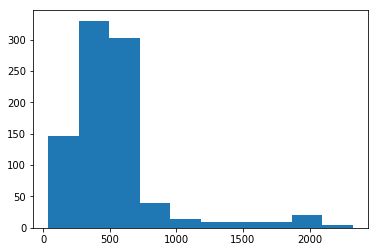

In [42]:
plt.hist(data['day_diff'])

In [0]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

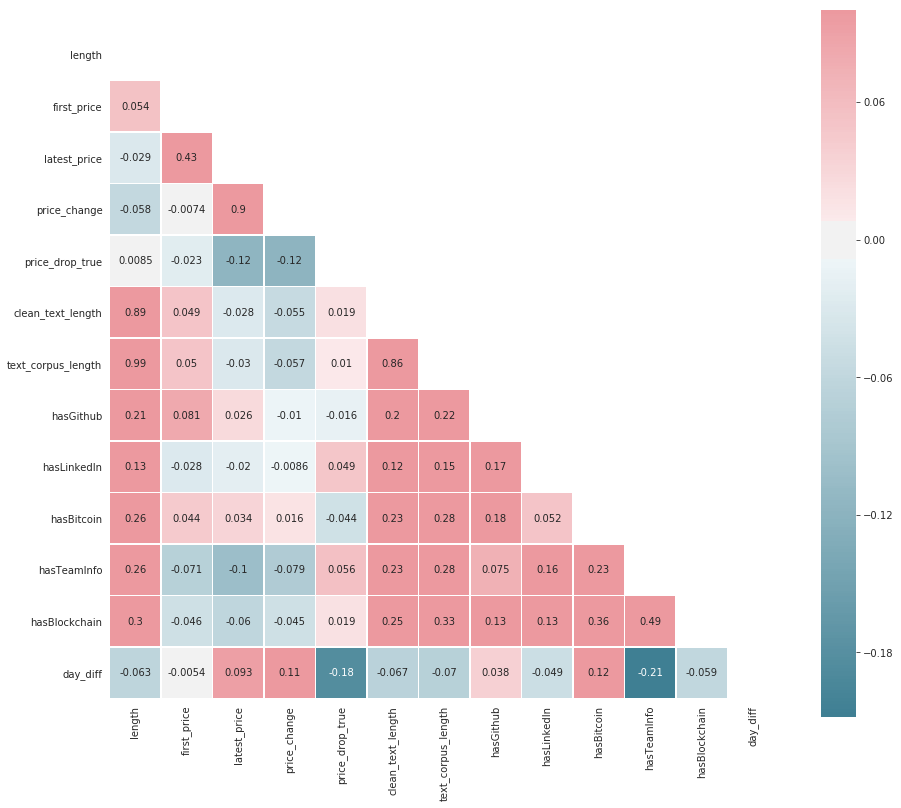

In [44]:
corr = data.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize =(15,13))

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap , vmax = .1 ,center =0, square=True, annot = True, linewidth = .1)


In [0]:
from textblob import TextBlob

In [0]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1]

def polarity(x):
  return TextBlob(x).sentiment.polarity

In [47]:
data['polarity_scores'] = data['clean_text3'].apply(polarity)
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff,polarity_scores
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,417,0.035793
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,692,0.076354
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,424,0.114156
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,193,0.117475
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,535,0.122624


In [0]:
def subjectivity(x):
  return TextBlob(x).sentiment.subjectivity

In [49]:
data['subjectivity_scores'] = data['clean_text3'].apply(subjectivity)
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff,polarity_scores,subjectivity_scores
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,417,0.035793,0.483881
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,692,0.076354,0.443694
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,424,0.114156,0.429502
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,193,0.117475,0.358987
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,535,0.122624,0.383026


(array([ 83., 508., 270.,  18.,   2.,   1.,   0.,   1.,   0.,   1.]),
 array([-0.03051948,  0.03919913,  0.10891775,  0.17863636,  0.24835498,
         0.31807359,  0.38779221,  0.45751082,  0.52722944,  0.59694805,
         0.66666667]),
 <a list of 10 Patch objects>)

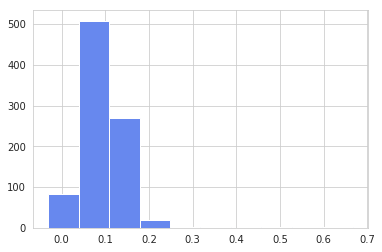

In [50]:
plt.hist(data['polarity_scores'].values)

(array([ 43.,   2.,   2.,  23., 207., 524.,  76.,   4.,   0.,   3.]),
 array([0.        , 0.07862434, 0.15724868, 0.23587302, 0.31449735,
        0.39312169, 0.47174603, 0.55037037, 0.62899471, 0.70761905,
        0.78624339]),
 <a list of 10 Patch objects>)

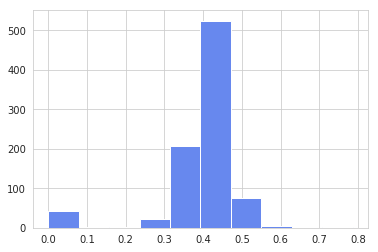

In [51]:
plt.hist(data['subjectivity_scores'].values)

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

In [0]:
stopwords_cv = ['blockchain','user','data'] + list(esw)

In [0]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='GnBu_d')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [0]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words= stopwords_cv)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['clean_text3'])

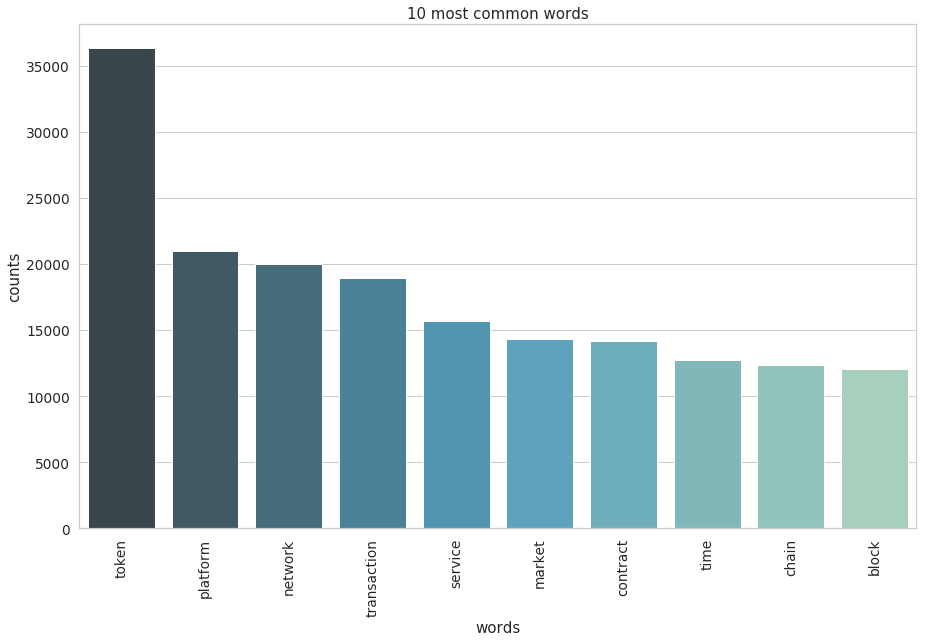

In [64]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
data['log_first_price'] = np.log(data['first_price'])
data['log_latest_price'] = np.log(data['latest_price'])
data['log_daysdiff'] = np.log(data['day_diff'])
data['log_clean_text1'] = np.log(data['clean_text_length'])
data['log_clean_text2'] = np.log(data['text_corpus_length'])
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,readability,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_daysdiff,log_clean_text1,log_clean_text2
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,-2219.39,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,417,0.035793,0.483881,-0.727066,-3.289430,6.033086,8.295049,7.710653
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,-3043.91,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,692,0.076354,0.443694,-1.510488,-1.821092,6.539586,8.573384,8.018296
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,-8125.34,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,424,0.114156,0.429502,-3.131852,-6.850425,6.049733,9.518193,8.991438
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,-725.31,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,193,0.117475,0.358987,1.747653,1.232813,5.262690,7.200425,6.633318
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,-6529.42,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,535,0.122624,0.383026,-1.257620,-3.879153,6.282267,9.250426,8.774931


In [0]:
data['log_polarity'] = np.log(data['polarity_scores'])
data['log_subjectivity'] = np.log(data['subjectivity_scores'])
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,readability,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_daysdiff,log_clean_text1,log_clean_text2,log_polarity,log_subjectivity
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,-2219.39,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,417,0.035793,0.483881,-0.727066,-3.289430,6.033086,8.295049,7.710653,-3.330013,-0.725916
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,-3043.91,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,692,0.076354,0.443694,-1.510488,-1.821092,6.539586,8.573384,8.018296,-2.572376,-0.812619
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,-8125.34,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,424,0.114156,0.429502,-3.131852,-6.850425,6.049733,9.518193,8.991438,-2.170190,-0.845130
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,-725.31,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,193,0.117475,0.358987,1.747653,1.232813,5.262690,7.200425,6.633318,-2.141529,-1.024469
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,-6529.42,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,535,0.122624,0.383026,-1.257620,-3.879153,6.282267,9.250426,8.774931,-2.098633,-0.959652


In [0]:
data_v1 = data[['first_price','clean_text_length','text_corpus_length','hasGithub','hasLinkedIn','hasBitcoin','hasTeamInfo','hasBlockchain','day_diff','log_first_price','log_daysdiff','log_clean_text1','log_clean_text2','price_drop_true']]

data_v1.head()

,first_price,clean_text_length,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff,log_first_price,log_daysdiff,log_clean_text1,log_clean_text2,price_drop_true
0,0.483325,4004,2232,0,0,1,0,1,417,-0.727066,6.033086,8.295049,7.710653,1
1,0.220802,5289,3036,1,0,0,0,1,692,-1.510488,6.539586,8.573384,8.018296,1
2,0.043637,13605,8034,1,1,1,1,1,424,-3.131852,6.049733,9.518193,8.991438,1
3,5.741111,1340,760,0,0,0,1,1,193,1.747653,5.262690,7.200425,6.633318,1
4,0.284330,10409,6470,0,0,1,1,1,535,-1.257620,6.282267,9.250426,8.774931,1


In [0]:
from sklearn import preprocessing, neighbors, svm
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix

import random

In [0]:
colnames = ['first_price','clean_text_length','text_corpus_length','hasGithub','hasLinkedIn','hasBitcoin','hasTeamInfo','hasBlockchain','day_diff']

x = data_v1[colnames]

x.head()

,first_price,clean_text_length,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff
0,0.483325,4004,2232,0,0,1,0,1,417
1,0.220802,5289,3036,1,0,0,0,1,692
2,0.043637,13605,8034,1,1,1,1,1,424
3,5.741111,1340,760,0,0,0,1,1,193
4,0.284330,10409,6470,0,0,1,1,1,535


In [0]:
y = data_v1['price_drop_true']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: price_drop_true, dtype: int64

In [0]:
x_train, x_text, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 1, stratify =y)

In [0]:
#establish baseline

random_list = np.random.randint(2, size = len(y_test))

random_list

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1])

In [0]:
#establish baseline accuracy

print(f1_score(random_list,y_test))
print(confusion_matrix(random_list,y_test))

0.5610859728506787
[[18 87]
 [10 62]]


In [0]:
lm = LogisticRegression(solver='lbfgs')
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lm_pred = lm.predict(x_text)

lm_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [0]:
f1_score(lm_pred, y_test)
confusion_matrix(lm_pred,y_test)

array([[  0,   0],
       [ 28, 149]])

In [0]:
y_test.value_counts()

1    149
0     28
Name: price_drop_true, dtype: int64

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_pred = rf.predict(x_text)
rf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [0]:
f1_score(rf_pred, y_test)

0.9096774193548388

In [0]:
confusion_matrix(rf_pred,y_test)

array([[  8,   8],
       [ 20, 141]])

In [0]:
print(classification_report(lm_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.84      0.91       177

    accuracy                           0.84       177
   macro avg       0.50      0.42      0.46       177
weighted avg       1.00      0.84      0.91       177



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.29      0.50      0.36        16
           1       0.95      0.88      0.91       161

    accuracy                           0.84       177
   macro avg       0.62      0.69      0.64       177
weighted avg       0.89      0.84      0.86       177



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
dt_pred = dt.predict(x_text)
dt_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0])

In [0]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.29      0.24      0.26        33
           1       0.83      0.86      0.85       144

    accuracy                           0.75       177
   macro avg       0.56      0.55      0.55       177
weighted avg       0.73      0.75      0.74       177



In [0]:
from xgboost import XGBClassifier

In [0]:
 xgb = XGBClassifier()
 xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_pred = xgb.predict(x_text)
xgb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [0]:
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.32      0.69      0.44        13
           1       0.97      0.88      0.93       164

    accuracy                           0.87       177
   macro avg       0.65      0.79      0.68       177
weighted avg       0.93      0.87      0.89       177



In [0]:
xgb.feature_importances_

array([0.139684  , 0.10936514, 0.15491633, 0.08091427, 0.095784  ,
       0.09102765, 0.06818936, 0.06877108, 0.19134818], dtype=float32)

In [0]:
xgb_auc = roc_auc_score(y_test , xgb_pred)
print('AUC: %.3f' % xgb_auc)

AUC: 0.647


In [0]:
fpr, tpr , thresholds = roc_curve(y_test, xgb_pred)

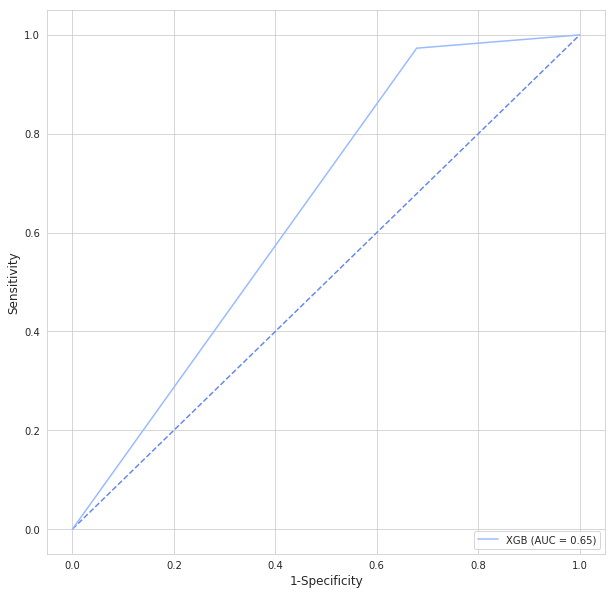

In [0]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='XGB (AUC = %0.2f)'% xgb_auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [0]:
#Gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec, CoherenceModel, LdaModel, LsiModel
from pprint import pprint

In [0]:
model = Word2Vec(size = 100, window = 5, min_count = 20, sg =0)
model.build_vocab(list_words)

In [0]:
model.wv.vocab.keys()

dict_keys(['chain', 'consensus', 'protocol', 'jonathan', 'thomas', 'austin', 'dept', 'computer', 'science', 'university', 'llc', 'san', 'jose', 'state', 'abstract', 'describe', 'blockchain', 'ecosystem', 'including', 'new', 'ering', 'fast', 'nality', 'provide', 'proof', 'security', 'along', 'experiment', 'result', 'validating', 'e', 'ciency', 'realistic', 'network', 'condition', 'introduction', 'since', 'advent', 'bitcoin', 'world', 'cryptocurrencies', 'distributed', 'computation', 'ethereum', 'woo', 'de', 'promise', 'integrating', 'turing', 'complete', 'smart', 'contract', 'building', 'application', 'dapps', 'despite', 'held', 'back', 'slow', 'time', 'example', 'transaction', 'con', 'nalized', 'six', 'block', 'deep', 'process', 'take', 'roughly', 'one', 'hour', 'newer', 'attempted', 'address', 'limitation', 'introducing', 'algorithm', 'faster', 'nity', 'us', 'randomness', 'beacon', 'imple', 'via', 'veri', 'able', 'random', 'function', 'vrf', 'ranking', 'di', 'erent', 'pro', 'posed', '

In [0]:
model.corpus_count

884

In [0]:
model.train(list_words, total_examples=model.corpus_count, epochs=5)

(16262311, 18130290)

In [0]:
model['blockchain']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.8300295 , -0.28104606, -1.6434584 , -0.41848463,  0.8216585 ,
        1.2037483 ,  1.41302   ,  0.61763996, -0.6847253 , -0.8141342 ,
       -1.2331076 , -0.36296442,  2.880796  ,  1.02127   ,  0.8153373 ,
       -0.59725356, -0.01756589, -2.150191  , -1.4033902 , -0.5676434 ,
        1.9396743 ,  0.5862157 ,  2.9859514 , -0.60240054,  0.2856447 ,
        0.47664788,  0.72839445,  1.8481269 , -0.5614864 , -0.57200205,
       -0.7826163 , -0.05206888, -1.0998176 ,  1.0315096 , -1.0441959 ,
       -0.3066693 ,  0.42583695, -0.1353291 ,  0.03261585,  0.07170193,
       -0.7895336 , -0.13015331, -1.2513995 ,  0.34400442, -0.16356659,
        1.4898623 ,  0.94853276, -1.161872  ,  0.3689767 , -2.0875287 ,
        0.33320564,  1.560783  ,  1.5306653 ,  0.8221614 ,  0.2781828 ,
        0.43958944, -1.4505086 ,  0.11288667,  0.86707973,  0.022226  ,
        0.37605572, -0.05756731,  0.07211609,  2.0672157 ,  1.9171365 ,
       -0.3364383 ,  0.02763064, -1.5458636 ,  0.24734828,  2.01

In [0]:
model.similarity('month','year')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.72700673

In [0]:
model.most_similar('user')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('consumer', 0.5280081033706665),
 ('customer', 0.5229572653770447),
 ('participant', 0.5117430686950684),
 ('advertiser', 0.48633837699890137),
 ('publisher', 0.4828016459941864),
 ('donor', 0.472933828830719),
 ('gamers', 0.47154319286346436),
 ('individual', 0.46748751401901245),
 ('visitor', 0.4643175005912781),
 ('browsing', 0.4544222354888916)]

In [0]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,readability,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_daysdiff,log_clean_text1,log_clean_text2,log_polarity,log_subjectivity
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,-2219.39,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,417,0.035793,0.483881,-0.727066,-3.289430,6.033086,8.295049,7.710653,-3.330013,-0.725916
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,-3043.91,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,692,0.076354,0.443694,-1.510488,-1.821092,6.539586,8.573384,8.018296,-2.572376,-0.812619
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,-8125.34,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,424,0.114156,0.429502,-3.131852,-6.850425,6.049733,9.518193,8.991438,-2.170190,-0.845130
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,-725.31,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,193,0.117475,0.358987,1.747653,1.232813,5.262690,7.200425,6.633318,-2.141529,-1.024469
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,-6529.42,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,535,0.122624,0.383026,-1.257620,-3.879153,6.282267,9.250426,8.774931,-2.098633,-0.959652


In [0]:
from collections import Counter

In [0]:
counts = Counter()
for i, clean_text in enumerate(data['clean_text3']):
    counts.update(clean_text.split())

In [0]:
words = sorted(counts, key=counts.get, reverse=True)
words[0:10]

['token',
 'user',
 'blockchain',
 'e',
 'platform',
 'data',
 'network',
 'transaction',
 'system',
 'service']

In [0]:
chars = words
nb_chars = len(words)
nb_chars

62667

In [0]:
word_to_int = {word: i for i, word in enumerate(words, 1)}
int_to_word = {i: word for i, word in enumerate(words, 1)}

In [0]:
int_to_word

{1: 'token',
 2: 'user',
 3: 'blockchain',
 4: 'e',
 5: 'platform',
 6: 'data',
 7: 'network',
 8: 'transaction',
 9: 'system',
 10: 'service',
 11: 'market',
 12: 'contract',
 13: 'time',
 14: 'n',
 15: 'chain',
 16: 'block',
 17: 'technology',
 18: 'r',
 19: 'c',
 20: 'node',
 21: 'use',
 22: 'smart',
 23: 'one',
 24: 'value',
 25: 'also',
 26: 'based',
 27: 'information',
 28: 'business',
 29: 'exchange',
 30: 'development',
 31: 'new',
 32: 'may',
 33: 'company',
 34: 'project',
 35: 'coin',
 36: 'p',
 37: 'application',
 38: 'team',
 39: 'payment',
 40: 'community',
 41: 'u',
 42: 'b',
 43: 'security',
 44: 'sale',
 45: 'asset',
 46: 'content',
 47: 'protocol',
 48: 'digital',
 49: 'wallet',
 50: 'used',
 51: 'http',
 52: 'number',
 53: 'ecosystem',
 54: 'currency',
 55: 'l',
 56: 'key',
 57: 'cryptocurrency',
 58: 'fund',
 59: 'bitcoin',
 60: 'decentralized',
 61: 'need',
 62: 'ethereum',
 63: 'process',
 64: 'using',
 65: 'risk',
 66: 'com',
 67: 'h',
 68: 'make',
 69: 'year',
 

In [0]:
mapped_whitepapers = []
for clean_text in data['clean_text3']:
    mapped_whitepapers.append([word_to_int[word] for word in clean_text.split()])

In [0]:
print('Original text:',data.loc[0]['clean_text3'])
print('Mapped text:',mapped_whitepapers[0])

Original text: chain consensus protocol jonathan katz thomas austin siva dirisala saswata basu dept computer science university maryland chain llc san jose state university chain llc abstract describe chain blockchain ecosystem including new consensus protocol ering fast nality provide proof security protocol along experiment result validating e ciency realistic network condition introduction since advent bitcoin nak blockchain revolutionized world cryptocurrencies distributed computation ethereum woo de veloped promise integrating turing complete smart contract blockchain building distributed application dapps despite promise blockchain protocol held back slow consensus time example bitcoin transaction con sidered nalized six block deep chain process take roughly one hour newer protocol attempted address limitation introducing consensus algorithm faster nalization time one protocol nity hmw us randomness beacon imple mented via veri able random function vrf ranking di erent pro posed 

In [0]:
data.loc[0:1]['clean_text3']

0    chain consensus protocol jonathan katz thomas ...
1    x open protocol decentralized exchange ethereu...
Name: clean_text3, dtype: object

In [0]:
print(mapped_whitepapers[0:2])

[[15, 125, 47, 5866, 13077, 4458, 8653, 23009, 27217, 27218, 27219, 9999, 446, 760, 435, 14251, 15, 2279, 4176, 8981, 154, 435, 15, 2279, 1018, 2132, 15, 3, 53, 111, 31, 125, 47, 4003, 662, 7432, 86, 88, 43, 47, 889, 2036, 122, 3123, 4, 2562, 4386, 7, 275, 517, 206, 4086, 59, 15944, 3, 10478, 74, 189, 104, 884, 62, 8812, 414, 17062, 1145, 2459, 2272, 376, 22, 12, 3, 383, 104, 37, 704, 1530, 1145, 3, 47, 673, 441, 1699, 125, 13, 134, 59, 8, 513, 20244, 6608, 2122, 16, 1192, 15, 63, 183, 2699, 23, 856, 5142, 47, 5068, 107, 837, 1648, 125, 121, 1011, 10479, 13, 23, 47, 7014, 17063, 406, 2809, 4733, 6760, 11015, 239, 679, 127, 710, 150, 3262, 1804, 521, 1119, 646, 7635, 16, 2104, 25, 1189, 465, 2165, 753, 1416, 3498, 16, 598, 1135, 2132, 4481, 9780, 35515, 125, 598, 23, 16, 7433, 100, 423, 7433, 16, 6608, 1311, 4419, 2995, 7433, 16, 924, 138, 15, 235, 2369, 8813, 5216, 169, 4, 1623, 243, 129, 14252, 15, 746, 662, 4882, 350, 5, 469, 30, 88, 243, 125, 47, 4576, 714, 83, 335, 96, 106, 15, 47,

In [0]:
length_sent = []
for i in range(len(mapped_whitepapers)):
  length_sent.append(len(mapped_whitepapers[i]))
max(length_sent)

21407

In [0]:
sequence_length = max(length_sent)
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(maxlen=sequence_length, sequences=mapped_whitepapers, padding="post", value=0)

Using TensorFlow backend.


In [0]:
X.shape

(884, 21407)

In [0]:
y=data['hasBlockchain'].values

In [0]:
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=10)
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [0]:
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.layers.embeddings import Embedding

In [0]:
embedding_vecor_length=32
max_review_length= 21407
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 21407))
model.add(SimpleRNN(40, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21407, 32)         401056    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 40)                2920      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 82        
Total params: 404,058
Trainable params: 404,058
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
12533*32

401056

In [0]:
(32+40)*40+40

2920

In [0]:
from gensim.parsing.preprocessing import STOPWORDS

In [0]:
dictionary = gensim.corpora.Dictionary(data['text_corpus'])

In [0]:
#Filter out words that occur less than 20 whitepapers
dictionary.filter_extremes(no_below=20,no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 6572


In [0]:
#Transforming corpus into bag of words vectors

bow_corpus = [dictionary.doc2bow(doc) for doc in list_words]
print(bow_corpus[1][:50])

[(1, 1), (2, 1), (3, 1), (4, 1), (6, 2), (7, 4), (11, 1), (12, 1), (14, 1), (20, 2), (21, 1), (27, 4), (28, 3), (30, 4), (31, 1), (32, 2), (42, 1), (44, 3), (62, 3), (68, 3), (70, 3), (75, 3), (78, 1), (83, 2), (85, 1), (89, 1), (91, 1), (94, 1), (97, 1), (100, 1), (112, 1), (113, 7), (114, 11), (115, 1), (116, 1), (125, 1), (127, 1), (128, 1), (133, 1), (135, 4), (147, 1), (148, 1), (149, 3), (150, 5), (151, 2), (155, 1), (158, 1), (159, 2), (160, 3), (161, 1)]


In [0]:
print([(dictionary[idx], freq) for idx, freq in bow_corpus[1][:50]])

[('absolute', 1), ('abstract', 1), ('accepted', 1), ('acm', 1), ('across', 2), ('act', 4), ('added', 1), ('adding', 1), ('advent', 1), ('always', 2), ('among', 1), ('anyone', 4), ('appendix', 3), ('approach', 4), ('arbitrarily', 1), ('arbitrary', 2), ('attacker', 1), ('attempt', 3), ('building', 3), ('cant', 3), ('cation', 3), ('changed', 3), ('ciency', 1), ('communication', 2), ('computation', 1), ('con', 1), ('condition', 1), ('considered', 1), ('consists', 1), ('containing', 1), ('daniel', 1), ('dapp', 7), ('dapps', 11), ('david', 1), ('de', 1), ('depends', 1), ('describe', 1), ('described', 1), ('determine', 1), ('di', 4), ('dynamically', 1), ('earlier', 1), ('ect', 3), ('ed', 5), ('either', 2), ('enough', 1), ('entire', 1), ('entity', 2), ('epoch', 3), ('equal', 1)]


In [0]:
print('Total number of whitepapers:', len(bow_corpus))

Total number of whitepapers: 884


In [0]:
#Load the library with the CountVectorizer Method
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts1 = np.zeros(len(words))
  
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [0]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

In [0]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['clean_text3'])

In [0]:
# Visualise the 10 most common words
top_10_most_common_words(count_data, count_vectorizer)

UnboundLocalError: ignored

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2,workers =2)

In [0]:
#Using LDA algorithm to output the first 10 topics
for idx, topic in lda_model.print_topics(-1):
  print('Topic {} \nWords: {}'.format(idx, topic))

Topic 0 
Words: 0.005*"node" + 0.003*"n" + 0.003*"whitepaper" + 0.003*"participant" + 0.003*"app" + 0.003*"p" + 0.003*"mobile" + 0.003*"document" + 0.003*"ico" + 0.002*"device"
Topic 1 
Words: 0.006*"game" + 0.005*"merchant" + 0.004*"whitepaper" + 0.004*"ico" + 0.004*"customer" + 0.003*"trading" + 0.003*"investor" + 0.003*"node" + 0.003*"cryptocurrencies" + 0.003*"mobile"
Topic 2 
Words: 0.006*"node" + 0.005*"p" + 0.004*"consumer" + 0.004*"r" + 0.004*"diamond" + 0.003*"device" + 0.003*"n" + 0.003*"storage" + 0.003*"whitepaper" + 0.003*"client"
Topic 3 
Words: 0.012*"node" + 0.004*"consensus" + 0.003*"hash" + 0.003*"mining" + 0.003*"ledger" + 0.002*"attack" + 0.002*"peer" + 0.002*"resource" + 0.002*"storage" + 0.002*"vote"
Topic 4 
Words: 0.012*"n" + 0.009*"r" + 0.008*"p" + 0.006*"l" + 0.005*"node" + 0.005*"h" + 0.004*"ad" + 0.004*"f" + 0.004*"k" + 0.004*"advertising"
Topic 5 
Words: 0.007*"node" + 0.003*"p" + 0.003*"trading" + 0.003*"ico" + 0.003*"n" + 0.003*"whitepaper" + 0.003*"r" + 

In [0]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus = bow_corpus, id2word = dictionary, num_topics = 20, random_state =100, update_every = 1,
                                            chunksize=100,passes=10,alpha='auto',per_word_topics=True)

In [0]:
pprint(lda_model2.print_topics())

[(0,
  '0.035*"provider" + 0.026*"buyer" + 0.016*"utility" + 0.012*"bid" + '
  '0.011*"auction" + 0.011*"car" + 0.010*"operator" + 0.010*"vehicle" + '
  '0.010*"registry" + 0.009*"property"'),
 (1,
  '0.027*"advertising" + 0.020*"ad" + 0.018*"social" + 0.016*"creator" + '
  '0.015*"publisher" + 0.015*"advertiser" + 0.012*"video" + 0.011*"revenue" + '
  '0.009*"quality" + 0.008*"influencers"'),
 (2,
  '0.018*"mining" + 0.013*"miner" + 0.011*"po" + 0.009*"stake" + 0.007*"pow" + '
  '0.007*"masternode" + 0.006*"masternodes" + 0.006*"attack" + 0.005*"staking" '
  '+ 0.005*"cryptocurrencies"'),
 (3,
  '0.016*"whitepaper" + 0.009*"statement" + 0.009*"law" + 0.009*"shall" + '
  '0.008*"legal" + 0.008*"jurisdiction" + 0.008*"purchaser" + 0.008*"white" + '
  '0.008*"regulatory" + 0.007*"person"'),
 (4,
  '0.067*"x" + 0.038*"job" + 0.031*"task" + 0.028*"fe" + 0.027*"worker" + '
  '0.025*"bounty" + 0.019*"cloud" + 0.019*"object" + 0.017*"computing" + '
  '0.014*"ambassador"'),
 (5,
  '0.019*"ener

In [0]:
# Compute Perplexity
print('\nPerplexity:', lda_model2.log_perplexity(bow_corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model2, texts = list_words, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


Perplexity: -7.6875091498976

Coherence Score: 0.546412192493791


In [0]:
lsi_model = LsiModel(corpus = bow_corpus, num_topics = 10, id2word = dictionary)

In [0]:
lsi_model.show_topics(num_topics=10)

[(0,
  '0.593*"n" + 0.570*"r" + 0.329*"l" + 0.288*"h" + 0.245*"p" + 0.162*"f" + 0.158*"g" + 0.119*"w" + 0.078*"k" + 0.019*"x"'),
 (1,
  '0.346*"node" + 0.120*"consensus" + 0.111*"whitepaper" + 0.101*"foundation" + 0.092*"customer" + 0.092*"trading" + 0.086*"provider" + 0.085*"participant" + 0.085*"energy" + 0.085*"storage"'),
 (2,
  '-0.668*"node" + -0.186*"consensus" + 0.154*"energy" + -0.123*"hash" + 0.114*"customer" + 0.101*"ico" + 0.097*"trading" + -0.092*"signature" + 0.088*"consumer" + 0.083*"investor"'),
 (3,
  '0.829*"energy" + 0.255*"grid" + 0.134*"green" + -0.132*"game" + 0.113*"plant" + 0.098*"node" + 0.094*"electricity" + 0.092*"renewable" + 0.076*"customer" + -0.074*"advertising"'),
 (4,
  '0.349*"node" + -0.221*"miner" + -0.204*"output" + 0.177*"credit" + -0.145*"x" + -0.132*"scheme" + -0.128*"de" + -0.124*"veri" + -0.121*"size" + -0.120*"input"'),
 (5,
  '0.615*"game" + 0.295*"player" + -0.206*"credit" + 0.164*"advertising" + -0.164*"merchant" + 0.160*"sport" + 0.150*"en

In [0]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 9.3MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=97ab0c91f5b41821bb6b6f1ca9a657592b5f84e7c8cc8c307a0f045bcee9dc3b
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [0]:
import pyLDAvis
import pyLDAvis.gensim

In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2,bow_corpus,dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.128640  0.025949       1        1  15.918840
16    -0.110597 -0.111696       2        1  11.017576
3     -0.076605  0.010467       3        1   9.738566
5     -0.107982 -0.036536       4        1   8.896637
2     -0.100420 -0.058424       5        1   8.008898
15    -0.001043 -0.157927       6        1   7.586914
9     -0.081162  0.085721       7        1   5.358981
11    -0.088987  0.025171       8        1   5.055160
8     -0.071342 -0.110818       9        1   4.406741
7      0.017743 -0.121922      10        1   4.032083
1     -0.067620  0.041425      11        1   3.938752
18     0.501729 -0.058094      12        1   2.889005
17    -0.058021  0.144953      13        1   2.731445
13    -0.016492  0.001249      14        1   2.296024
6     -0.006377 -0.141602      15        1   2.242830
0      0.001536  0.049882      16        1   2.037842
19     0.061166  0.204244      17        1   1.235592
10     0.120404  0.043246      18        1   0.939083
14     0.078744  0.273463      19        1   0.899799
4      0.133968 -0.108748      20        1   0.769235, topic_info=     Category          Freq            Term         Total  loglift  logprob
295   Default  12254.000000               n  12254.000000  30.0000  30.0000
365   Default  11337.000000               r  11337.000000  29.0000  29.0000
3269  Default   6707.000000               l   6707.000000  28.0000  28.0000
203   Default   6328.000000               h   6328.000000  27.0000  27.0000
910   Default   8739.000000               p   8739.000000  26.0000  26.0000
759   Default   4454.000000            game   4454.000000  25.0000  25.0000
304   Default   9980.000000            node   9980.000000  24.0000  24.0000
195   Default   5229.000000               g   5229.000000  23.0000  23.0000
1483  Default   4164.000000               f   4164.000000  22.0000  22.0000
2212  Default   2690.000000        merchant   2690.000000  21.0000  21.0000
1323  Default   2616.000000          credit   2616.000000  20.0000  20.0000
1087  Default   3428.000000               x   3428.000000  19.0000  19.0000
2777  Default   3179.000000               w   3179.000000  18.0000  18.0000
1049  Default   4507.000000         trading   4507.000000  17.0000  17.0000
1583  Default   4312.000000             ico   4312.000000  16.0000  16.0000
1857  Default   3863.000000        provider   3863.000000  15.0000  15.0000
2864  Default   2283.000000              ai   2283.000000  14.0000  14.0000
1808  Default   2444.000000          player   2444.000000  13.0000  13.0000
1056  Default   3077.000000           trust   3077.000000  12.0000  12.0000
2536  Default   2401.000000     marketplace   2401.000000  11.0000  11.0000
662   Default   3911.000000        customer   3911.000000  10.0000  10.0000
1423  Default   3388.000000          energy   3388.000000   9.0000   9.0000
604   Default   2386.000000           buyer   2386.000000   8.0000   8.0000
2138  Default   2058.000000            vote   2058.000000   7.0000   7.0000
1634  Default   3862.000000        investor   3862.000000   6.0000   6.0000
253   Default   3083.000000               k   3083.000000   5.0000   5.0000
1123  Default   2208.000000     advertising   2208.000000   4.0000   4.0000
2151  Default   4882.000000      whitepaper   4882.000000   3.0000   3.0000
2826  Default   1346.000000         lottery   1346.000000   2.0000   2.0000
2139  Default   1942.000000          voting   1942.000000   1.0000   1.0000
...       ...           ...             ...           ...      ...      ...
3960  Topic20     10.103514           mysql     31.296003   3.7369  -7.2915
484   Topic20    455.742737            task   1441.930176   3.7157  -3.4824
4025  Topic20     52.583958              sn    169.874756   3.6949  -5.6419
3963  Topic20    160.584457      networking    530.509033   3.6725  -4.5255
3834  Topic20     42.516674      

In [0]:
ldatopics = lda_model2.show_topics(formatted=False)
ldatopics

[(14,
  [('lottery', 0.07756374),
   ('betting', 0.044113223),
   ('prediction', 0.040732916),
   ('oracle', 0.03115215),
   ('bet', 0.030970879),
   ('win', 0.02354127),
   ('game', 0.018873814),
   ('outcome', 0.018376863),
   ('gambling', 0.017975325),
   ('player', 0.01792771)]),
 (4,
  [('x', 0.06683364),
   ('job', 0.03751287),
   ('task', 0.030732805),
   ('fe', 0.027737737),
   ('worker', 0.026534993),
   ('bounty', 0.025024222),
   ('cloud', 0.018763533),
   ('object', 0.018701652),
   ('computing', 0.016812561),
   ('ambassador', 0.014426138)]),
 (10,
  [('credit', 0.10066921),
   ('loan', 0.06460092),
   ('lending', 0.03950323),
   ('institution', 0.030228157),
   ('collateral', 0.028889477),
   ('trusted', 0.023381794),
   ('circle', 0.021040887),
   ('bank', 0.014772845),
   ('lender', 0.014316377),
   ('tag', 0.013827145)]),
 (19,
  [('merchant', 0.10377627),
   ('seller', 0.037295133),
   ('trust', 0.036863446),
   ('marketplace', 0.035029404),
   ('buyer', 0.030517068),

In [0]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,readability,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,day_diff,polarity_scores,subjectivity_scores
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,-2219.39,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,417,0.035793,0.483881
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,-3043.91,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,692,0.076354,0.443694
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,-8125.34,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,424,0.114156,0.429502
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,-725.31,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,193,0.117475,0.358987
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,-6529.42,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,535,0.122624,0.383026


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['clean_text3']).toarray()
y = data['hasBlockchain'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 16   3]
 [ 19 139]]
